# Exploring the data.
Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.

### KEY TERMS FOR EXPLORING THE DISTRIBUTION
### Boxplot
- A plot introduced by Tukey as a quick way to visualize the distribution of data.
    - Synonym
        - box and whiskers plot

### Frequency table
- A tally of the count of numeric data values that fall into a set of intervals (bins).

### Histogram
- A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis. While visually similar, bar charts should not be confused with histograms.
### Density plot
- A smoothed version of the histogram, often based on a kernel density estimate.

## Percentiles and Boxplots
- we explored how percentiles can be used to measure the spread of the data. Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
state = pd.read_csv(r'G:\data_science\data\state.csv')
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [3]:
#The pandas data frame method quantile provides it in Python:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

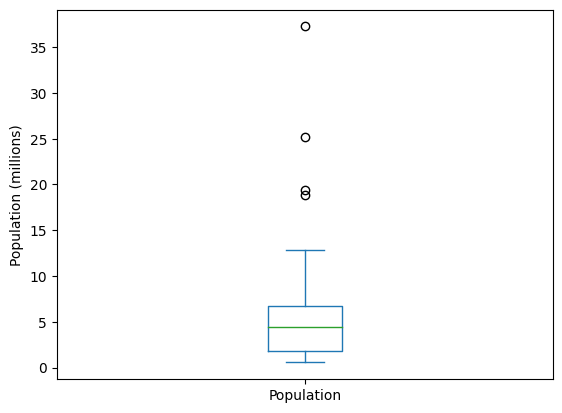

In [4]:
#Boxplots, introduced by Tukey [Tukey-1977], are based on percentiles and give a quick way to visualize the distribution of data.
ax=(state['Population']/1000000).plot(kind='box')
ax.set_ylabel('Population (millions)')

- From this boxplot we can immediately see that the median state population is about 5 million.
- half the states fall between about 2 million and about 7 million, and there are some high population outliers.
- The top and bottom of the box are the 75th and 25th percentiles, respectively. 
- The median is shown by the horizontal line in the box. 
- The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data. 

- Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

## Frequency Tables
- A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each 

- The function pandas.cut creates a series that maps the values into the segments. 

- Using the method value_counts, we get the frequency table:

In [5]:
binnedPopulation=pd.cut(state['Population'],10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

In [6]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
df1=pd.DataFrame(groups)
df1

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


## NOTE
- Both frequency tables and percentiles summarize the data by creating bins. 
- In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. 
- The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.

# Histogram
- A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.

Text(0.5, 0, 'Population (millions)')

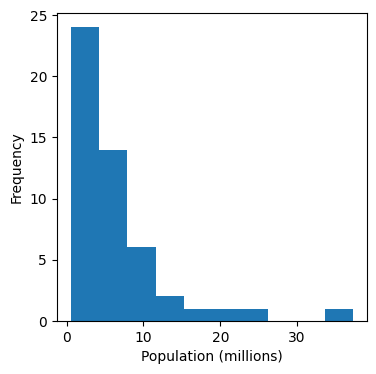

In [7]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

### In general, histograms are plotted such that:

- Empty bins are included in the graph.

- Bins are of equal width.

- The number of bins (or, equivalently, bin size) is up to the user.

- Bars are contiguous—no empty space shows between bars, unless there is an empty bin.

## STATISTICAL MOMENTS
- In statistical theory, location and variability are referred to as the first and second moments of a distribution. 
- The third and fourth moments are called skewness and kurtosis. 
- Skewness refers to whether the data is skewed to larger or smaller values.
- kurtosis indicates the propensity of the data to have extreme values. 
- Generally, metrics are not used to measure skewness and kurtosis; 
- instead, these are discovered through visual displays such as Figures like Boxplot and Histogram.

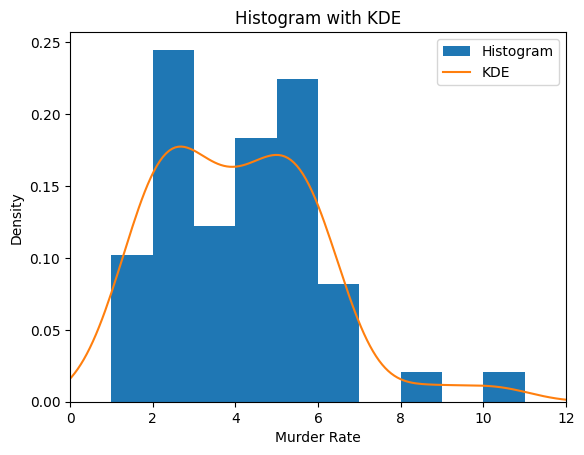

In [8]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
sns.kdeplot(state['Murder.Rate'], ax=ax)
plt.xlabel('Murder Rate')
plt.ylabel('Density')
plt.title('Histogram with KDE')
plt.legend(labels=['Histogram', 'KDE'])

- a density plot corresponds to plotting the histogram as a proportion rather than counts.
- Note that the total area under the density curve = 1


## Key take aways from this module.
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.

- A frequency table is a tabular version of the frequency counts found in a histogram.

- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.

- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).